### Windows PC 

While executing this notebook, you might hit a problem with the Playwright browser raising a NotImplementedError.

This should work when we move to python modules, but it can cause problems in Windows in a notebook.

If you it this error and would like to run the notebook, you need to make a small change which seems quite hacky!

1. Right click in `.venv` in the File Explorer on the left and select "Find in folder"
2. Search for `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())`  
3. That code should be found in a line of code in a file called `kernelapp.py`
4. Comment out that line of code in that file! And save the file.
5. Restart the kernel by pressing the "Restart" button above

Thank you to student Nicolas for finding this, and to Yaki, Zibin and Bhaskar for confirming that this worked for them!

In [32]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langchain.agents import Tool

from langchain_openai import AzureChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [33]:
load_dotenv(override=True)

True

In [36]:
llm = AzureChatOpenAI(model = os.environ["OPENAI_API_DEPLOYMENT"])
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BZxnpSgP2qhvuJVqO6UA2UzjD2ftQ', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}}, id='run--41e75b1c-3bd6-4966-821d-af431a7a43e0-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
class State(TypedDict):
    
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [51]:
pushover_token = "a1a3sxxxxxxxxxxxxxxxxxxxxx"
pushover_user = "ga8kj92xvxxxxxxxxxxxxxxxxxxx"
pushover_url = "https://api.pushover.net/1/messages.json"

def push(text: str, sound_type: str = "magic"):
    """Send a push notification to the user"""
    res = requests.post(
        pushover_url, 
        data = {"token": pushover_token, "user": pushover_user, "message": text, "sound": sound_type})
    print(res)

tool_push = Tool(
        name="send_push_notification",
        func=push,
        description="useful for when you want to send a push notification"
    )

In [18]:
push("Hi")

<Response [200]>


In [50]:
import requests

# Replace with your actual device key
device_key = 'u8kd5exxxxxxxxxxxxxx'

# Your API token
api_token = 'ays6jxi4xxxxxxxxxxxxx'

# Message details
data = {
    'token': api_token,
    'user': device_key,
    'title': 'this is serious see this!',
    'message': 'This is a test push notification 🚀'
}

# Send the request
response = requests.post("https://api.pushover.net/1/messages.json", data=data)

# Show result
print(f'Status Code: {response.status_code}')
print(response.text)


Status Code: 200
{"status":1,"request":"d311ad0b-27a5-44d3-abc6-9c17c50c6167"}


### Next: Install Playwright

On Windows and MacOS:  
`playwright install`

On Linux:  
`playwright install —with-reps chromium`

In [19]:
import nest_asyncio
nest_asyncio.apply()

In [52]:
from langchain_community.agent_toolkits import PlayWrightBrowserToolkit
from langchain_community.tools.playwright.utils import create_async_playwright_browser

async_browser =  create_async_playwright_browser(headless=False)  # headful mode
toolkit = PlayWrightBrowserToolkit.from_browser(async_browser=async_browser)
tools = toolkit.get_tools()

In [44]:
for tool in tools:
    print(f"{tool.name}={tool}")

click_element=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\SIVERMA\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
navigate_browser=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\SIVERMA\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
previous_webpage=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\SIVERMA\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
extract_text=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\SIVERMA\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
extract_hyperlinks=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\SIVERMA\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
get_elements=async_browser=<Browser type

In [ ]:
tool_dict = {tool.name:tool for tool in tools}

navigate_tool = tool_dict.get("navigate_browser")
extract_text_tool = tool_dict.get("extract_text")

    
await navigate_tool.arun({"url": "https://www.cnn.com"})
text = await extract_text_tool.arun({})

In [ ]:
import textwrap
print(textwrap.fill(text))

In [53]:
all_tools = tools + [tool_push]

In [54]:

llm = AzureChatOpenAI(model = os.environ['OPENAI_API_DEPLOYMENT'])
llm_with_tools = llm.bind_tools(all_tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


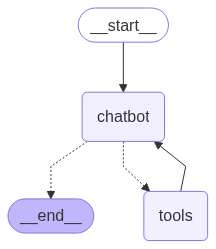

In [55]:

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=all_tools))
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
config = {"configurable": {"thread_id": "10"}}

async def chat(user_input: str, history):
    result = await graph.ainvoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


<Response [200]>
<Response [200]>
<Response [200]>


In [65]:
# __new__ is not a classmethod, it is rather a static method
# Python automatically calls it with the class (cls) during object creation.

In [ ]:
# When you write:
obj = MyClass()


# Python internally does this (simplified):
obj = MyClass.__new__(MyClass, ...)
if isinstance(obj, MyClass):
    MyClass.__init__(obj, ...)

# So, __new__ must:
# Accept the class (cls) as the first argument.
# Return a new instance (usually via super().__new__(cls)).

# becuase it called like this in bts, __init__ cannot be made async
# otherwise it will return coroutine and __init__ suppose to return only None

def __new__(cls, ...):  # No @classmethod needed
    return super().__new__(cls)



In [78]:
# 🚫 What Happens if You Use @classmethod?

class MyClass:
    @classmethod
    def __new__(cls):
        print("This is __new__")
        return super().__new__(cls)

    def __init__(self):
        print("This is __init__")

# __init__ is a static func not the classmethod though it seem like as classmethod because we pass cls

obj = MyClass()


TypeError: MyClass.__new__() takes 1 positional argument but 2 were given

## If Python internally always calls MyClass.__new__(MyClass, ...), then why didn’t the language designers just define __new__ as a @classmethod by default from the beginning?

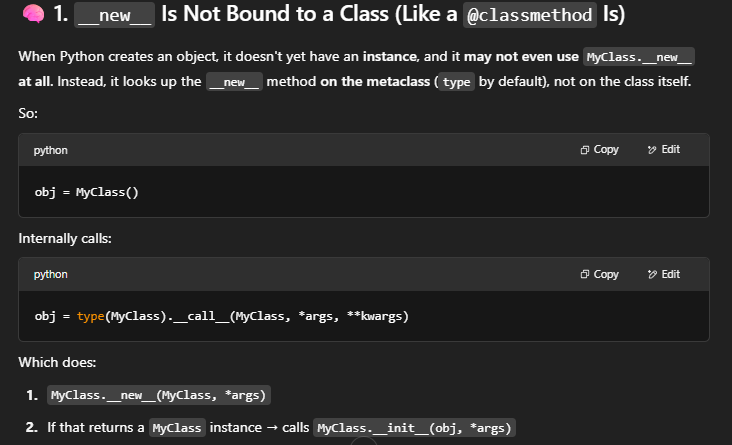